#LaptopPriceAnalysis

 ## Columns:
 * Company: Laptop Manufacturer.
 * Product: Brand and Model.
 * TypeName: Laptop Type (Notebook, Ultrabook, Gaming, …etc).
 * Inches: Screen Size.
 * Ram:Total amount of RAM in laptop (GBs).
 * OS:Operating System installed.
 * Weight: Laptop Weight in kilograms.
 * Price_euros: Price of Laptop in Euros. (Target)
 * Screen: screen definition (Standard, Full HD, 4K Ultra HD, Quad HD+).
 * ScreenW: screen width (pixels).
 * ScreenH: screen height (pixels).
 * Touchscreen: whether or not the laptop has a touchscreen.
 * IPSpanel: whether or not the laptop has an IPSpanel.
* RetinaDisplay: whether or not the laptop has retina display.
 * CPU_company
 * CPU_freq: frequency of laptop CPU (Hz).
 * CPU_model
 * PrimaryStorage: primary storage space (GB).
 * PrimaryStorageType: primary storage type (HDD, SSD, Flash Storage, Hybrid).
 * SecondaryStorage: secondary storage space if any (GB).
 * SecondaryStorageType: secondary storage type (HDD, SSD, Hybrid, None).
 * GPU_company
 * GPU_model

Import Libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

Load Dataset

In [80]:
data = pd.read_csv('laptop_prices.csv')
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


##Information about data

In [81]:
data.isnull().sum()

#no missing values

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [83]:
data.shape

(1275, 23)

In [84]:
data.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [85]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

##ExploratoryDataAnalysis

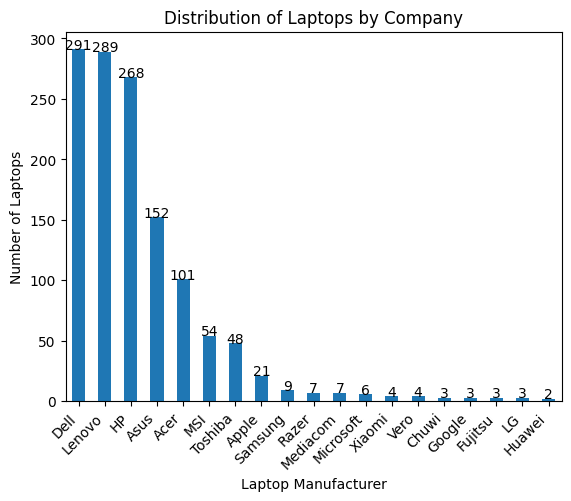

In [86]:
company_counts = data['Company'].value_counts()
company_counts.plot(kind='bar')
for i, value in enumerate(company_counts.values):
    plt.text(i, value + 0.1, str(value), ha='center')
plt.xlabel("Laptop Manufacturer")
plt.ylabel("Number of Laptops")
plt.title("Distribution of Laptops by Company")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if many companies

plt.show()

In [87]:
data['OS'].value_counts()

,count
OS,
Windows 10,1048
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Windows 10'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Linux'),
  Text(3, 0, 'Windows 7'),
  Text(4, 0, 'Chrome OS'),
  Text(5, 0, 'macOS'),
  Text(6, 0, 'Mac OS X'),
  Text(7, 0, 'Windows 10 S'),
  Text(8, 0, 'Android')])

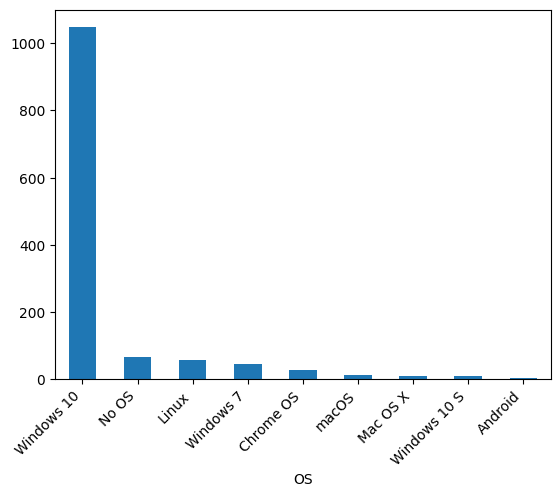

In [88]:
data['OS'].value_counts().plot(kind = 'bar' , x = data['OS'])
plt.xticks(rotation=45, ha='right')

<Axes: title={'center': 'TouchScreen'}, ylabel='count'>

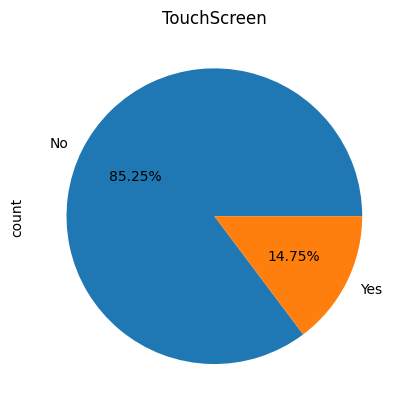

In [89]:
data['Touchscreen'].value_counts().plot(kind = 'pie', autopct = '%.2f%%' ,
 title = 'TouchScreen')

<Axes: xlabel='Ram'>

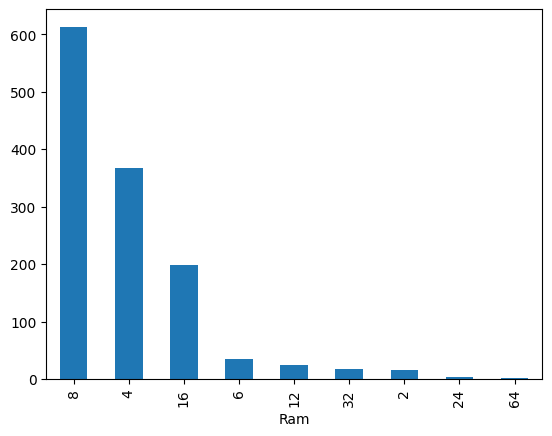

In [90]:
data['Ram'].value_counts().plot(kind = 'bar')

<Axes: title={'center': 'CPU_Company'}, ylabel='count'>

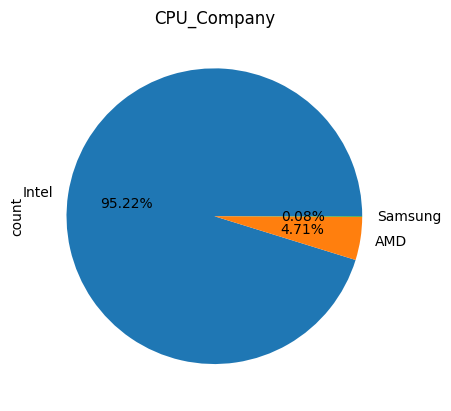

In [91]:
data['CPU_company'].value_counts().plot(kind = 'pie' , autopct = '%.2f%%',
title = 'CPU_Company')

<Axes: title={'center': 'GPU_Company'}, ylabel='count'>

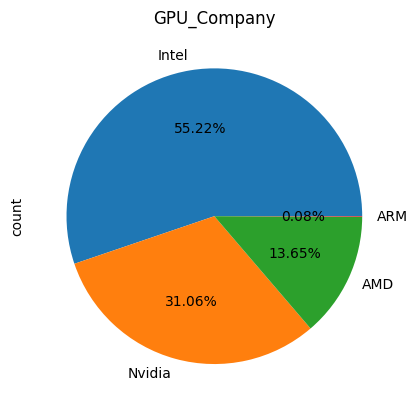

In [92]:
data['GPU_company'].value_counts().plot(kind = 'pie' , autopct = '%.2f%%',
title = 'GPU_Company')

<Axes: ylabel='count'>

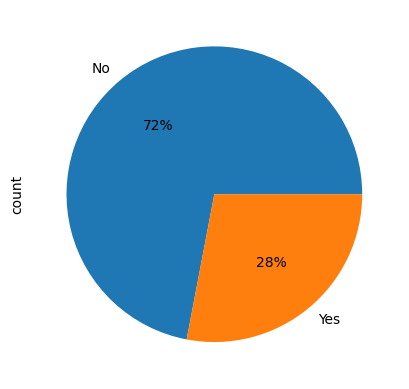

In [93]:
data['IPSpanel'].value_counts().plot(kind = 'pie' , autopct = '%.f%%')

<Axes: xlabel='Inches'>

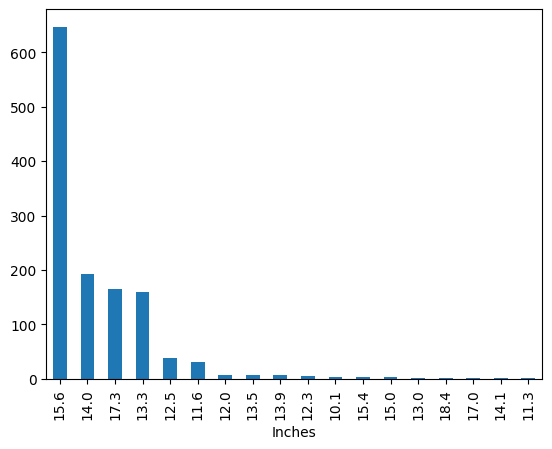

In [94]:
data['Inches'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

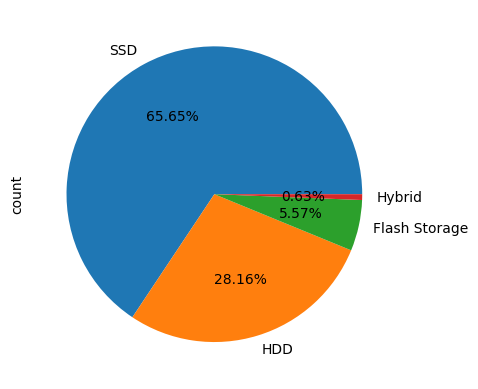

In [95]:
data['PrimaryStorageType'].value_counts().plot(kind = 'pie' , autopct ='%.2f%%')

<Axes: xlabel='Screen'>

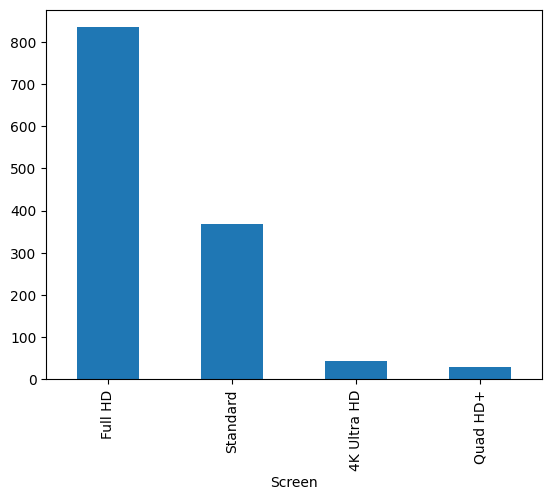

In [96]:
data['Screen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='SecondaryStorageType'>

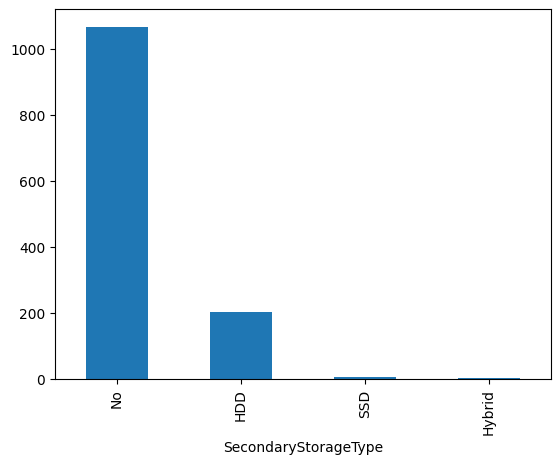

In [97]:
data['SecondaryStorageType'].value_counts().plot(kind = 'bar')

##Bivariate Analysis

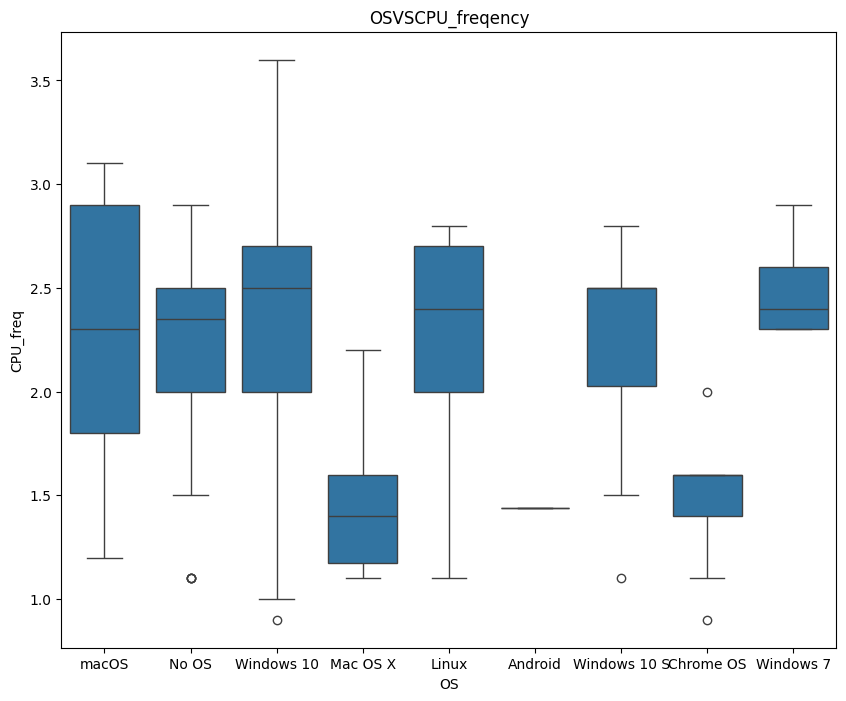

In [98]:
plt.figure(figsize=(10,8))
sns.boxplot(x=data['OS'],y=data['CPU_freq'])
plt.title('OSVSCPU_freqency')
plt.show()

In [99]:
data[['OS','Price_euros']].max()

,0
OS,macOS
Price_euros,6099.0


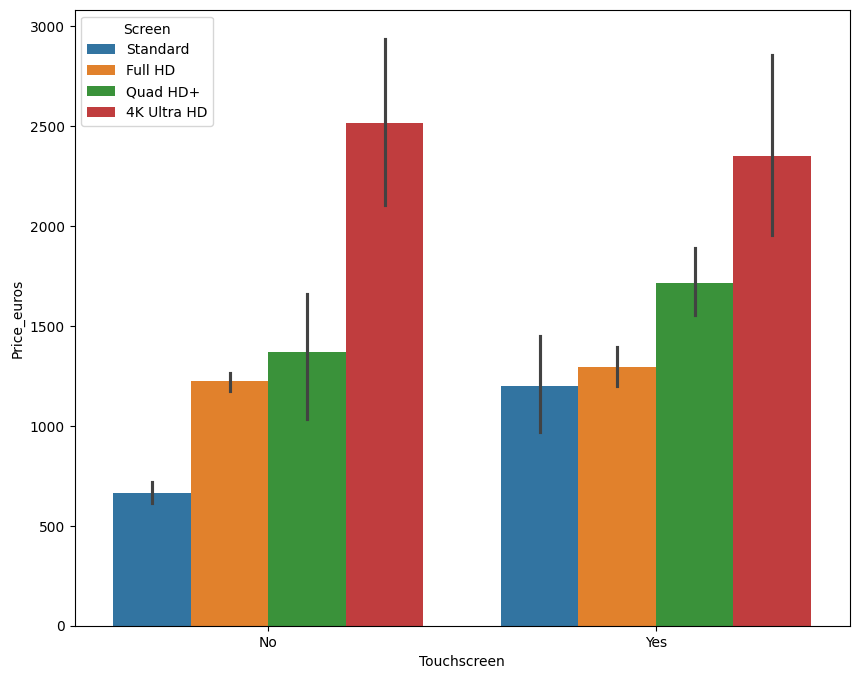

In [100]:
plt.figure(figsize = (10,8))
sns.barplot(x = data['Touchscreen'], y= data['Price_euros'] , hue = data['Screen'])
plt.show()

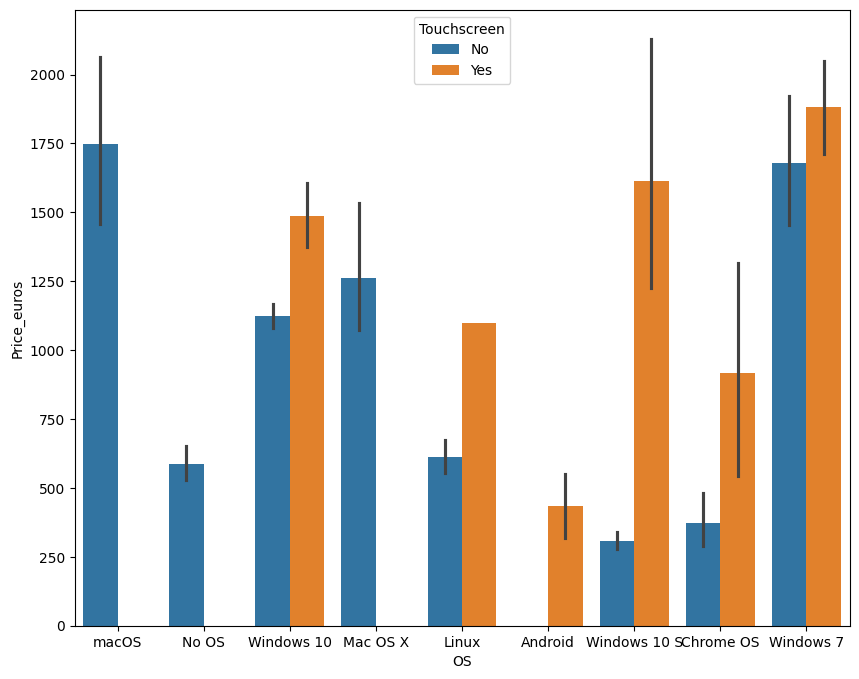

In [101]:
plt.figure(figsize = (10,8))
sns.barplot(x=data['OS'], y= data['Price_euros'], hue=data['Touchscreen'])
plt.show()

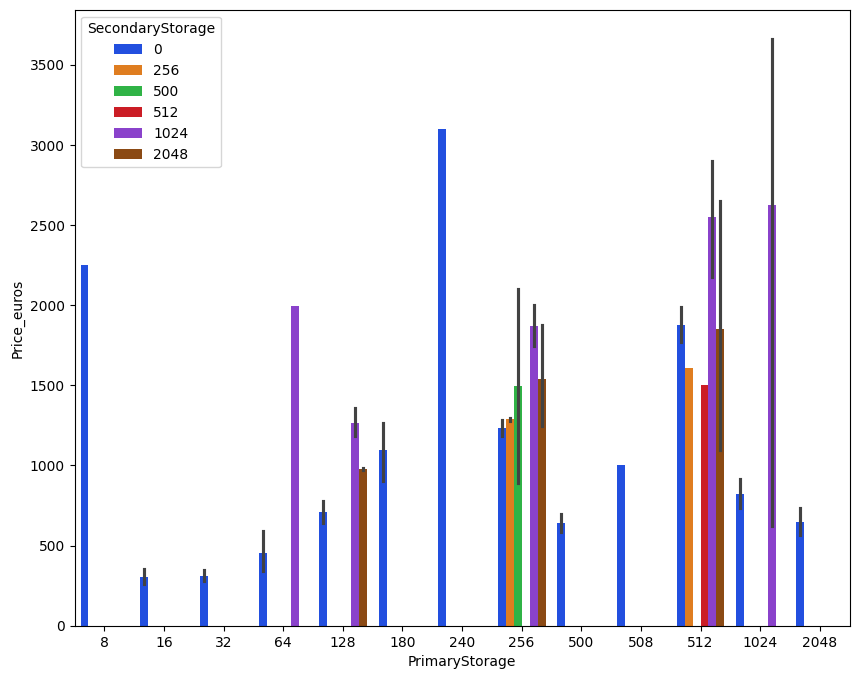

In [102]:
plt.figure(figsize = (10,8))
sns.barplot(x = data['PrimaryStorage'], y= data['Price_euros'] , hue =data['SecondaryStorage'],palette='bright')
plt.show()

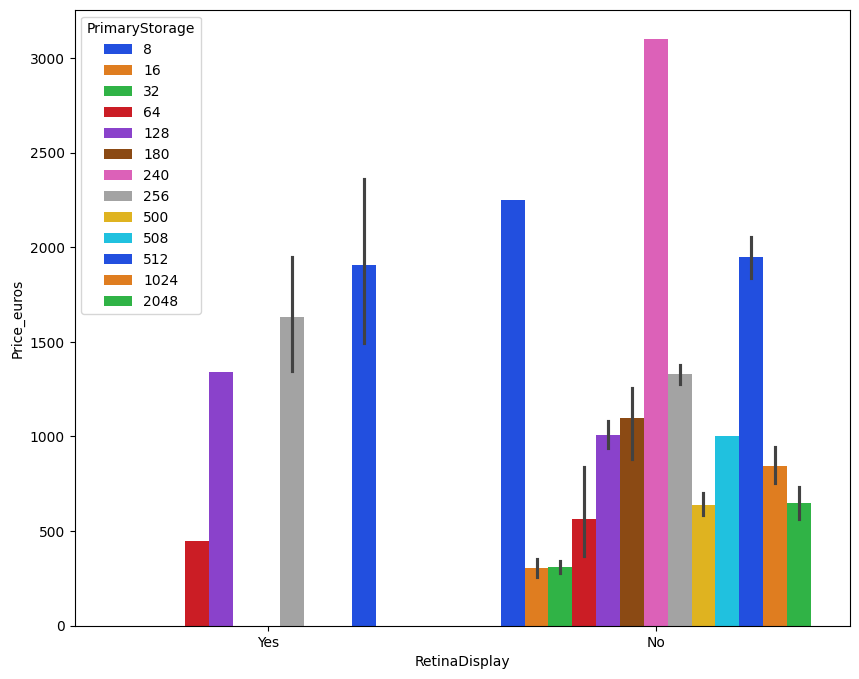

In [103]:
plt.figure(figsize = (10,8))
sns.barplot(x = data['RetinaDisplay'], y= data['Price_euros'], hue =data['PrimaryStorage'],palette='bright')
plt.show()